In [2]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

import matplotlib
import matplotlib.pyplot as plt
font = {'size'   : 20}
matplotlib.rc('font', **font)

import seaborn as sns

from pylab import rcParams
rcParams["figure.figsize"] = 30,16

import sklearn
from sklearn import metrics

import numpy as np
import scipy

import datetime as dt
from datetime import date

from collections import OrderedDict

import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.insert(0, "../")
import functions

In [3]:
df_verbrauch = pd.read_csv("Datenbeschaffung/verbrauch.csv", index_col=0, parse_dates=True)
df_verbrauch.index.freq = "D"

print(df_verbrauch)
print()
print(df_verbrauch.describe().transpose())

            verbrauch   wochentag feiertag  arbeitstag
datum                                                 
2015-01-01     126197  Donnerstag  Neujahr           0
2015-01-02     147085     Freitag      NaN           1
2015-01-03     141426     Samstag      NaN           0
2015-01-04     132446     Sonntag      NaN           0
2015-01-05     152611      Montag      NaN           1
...               ...         ...      ...         ...
2021-08-27     174359     Freitag      NaN           1
2021-08-28     140483     Samstag      NaN           0
2021-08-29     130834     Sonntag      NaN           0
2021-08-30     179559      Montag      NaN           1
2021-08-31     187846    Dienstag      NaN           1

[2435 rows x 4 columns]

             count           mean           std       min       25%       50%       75%       max
verbrauch   2435.0  168442.566324  26876.451049  102469.0  146591.0  174992.0  188829.5  231190.0
arbeitstag  2435.0       0.685832      0.464279       0.0      

# Stromverbrauch nach Jahren

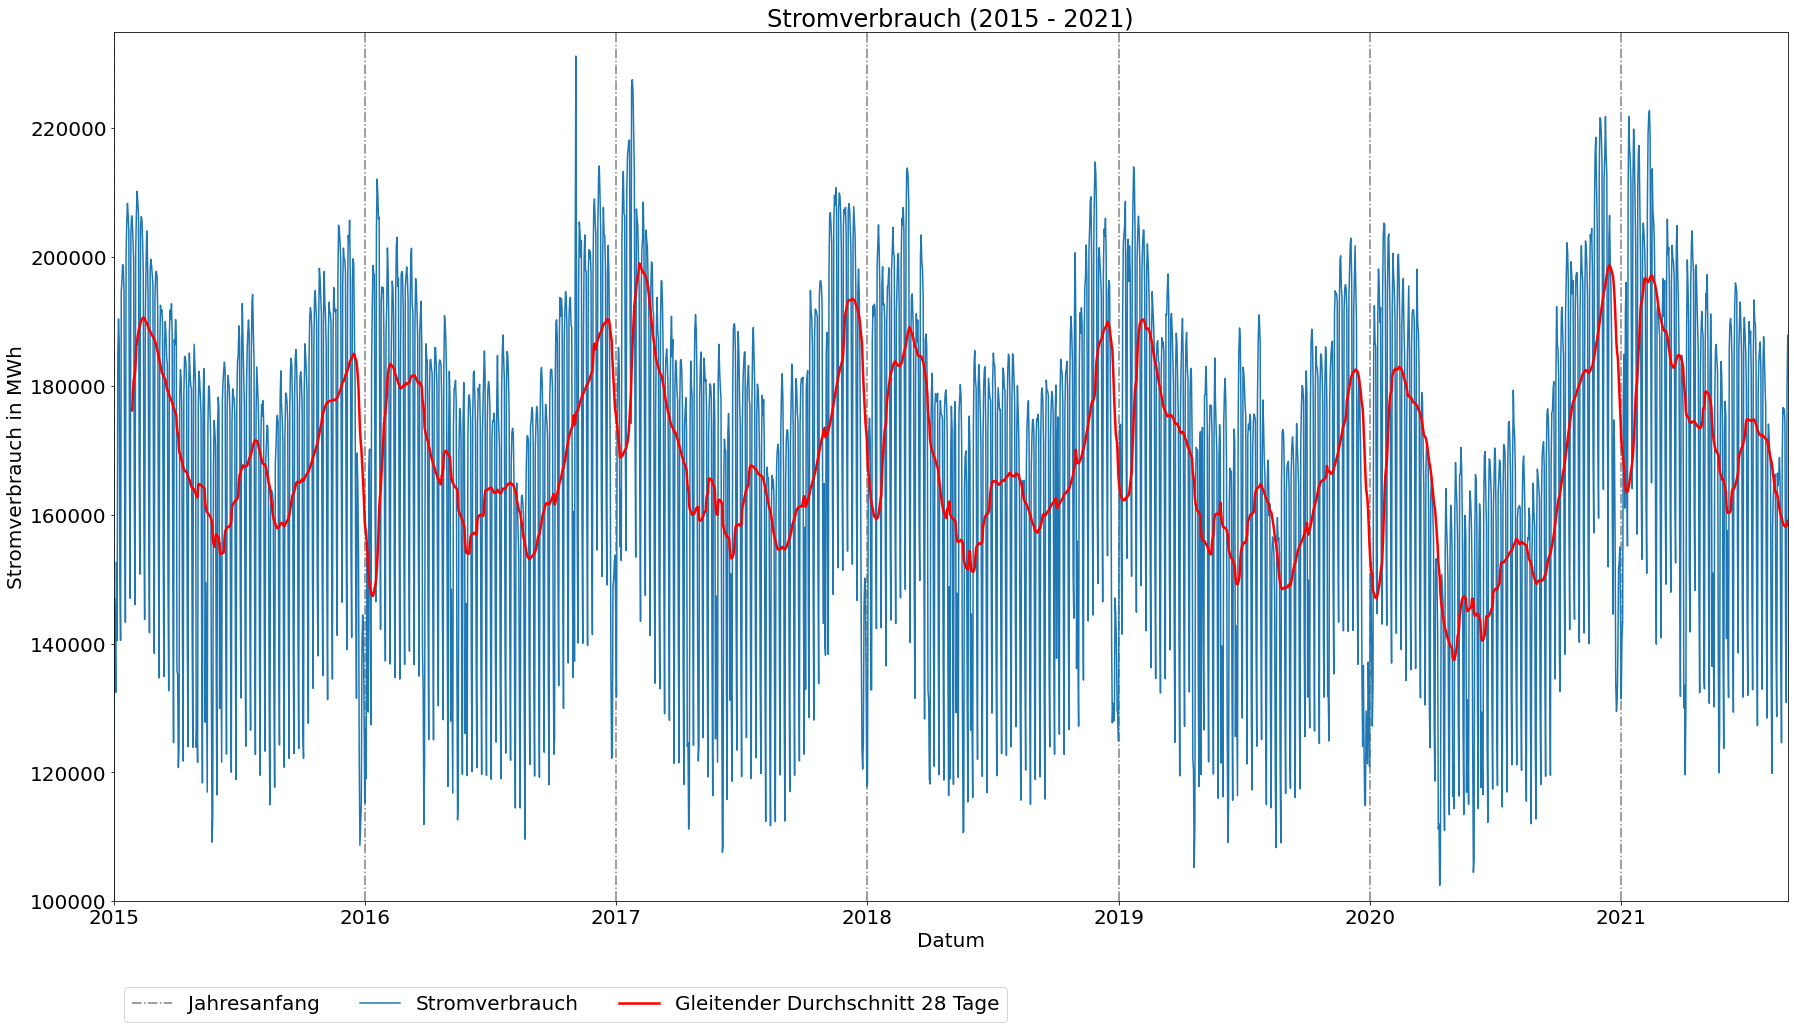

In [12]:
functions.draw_years(df_verbrauch)

plt.plot(df_verbrauch["verbrauch"], label="Stromverbrauch");
plt.plot(df_verbrauch["verbrauch"].rolling(window=28).mean(), color="red", linewidth=2.5, label="Gleitender Durchschnitt 28 Tage")

plt.title("Stromverbrauch (2015 - 2021)")
plt.ylim(100000,235000)
plt.ylabel("Stromverbrauch in MWh")
plt.xlim(dt.datetime(2015,1,1), dt.datetime(2021,8,31))
plt.xlabel("Datum")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=5)

plt.show()

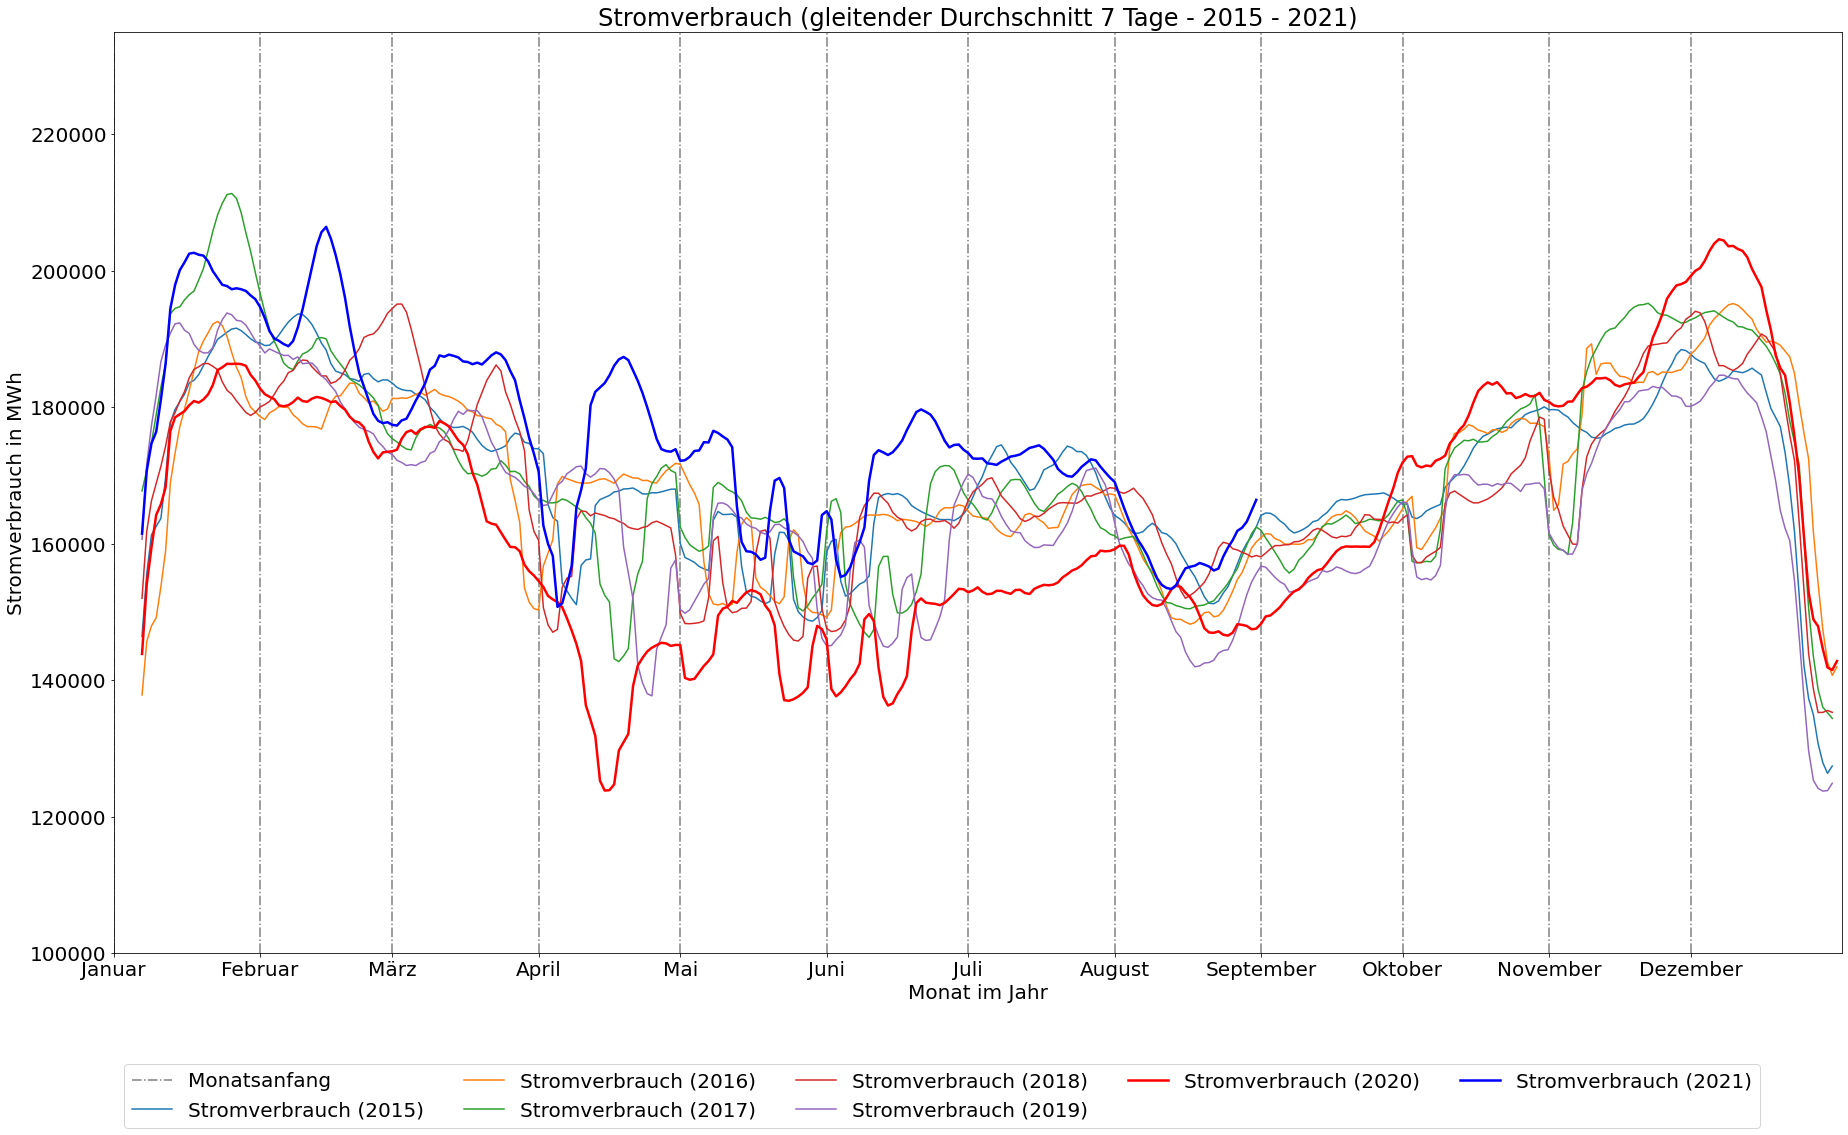

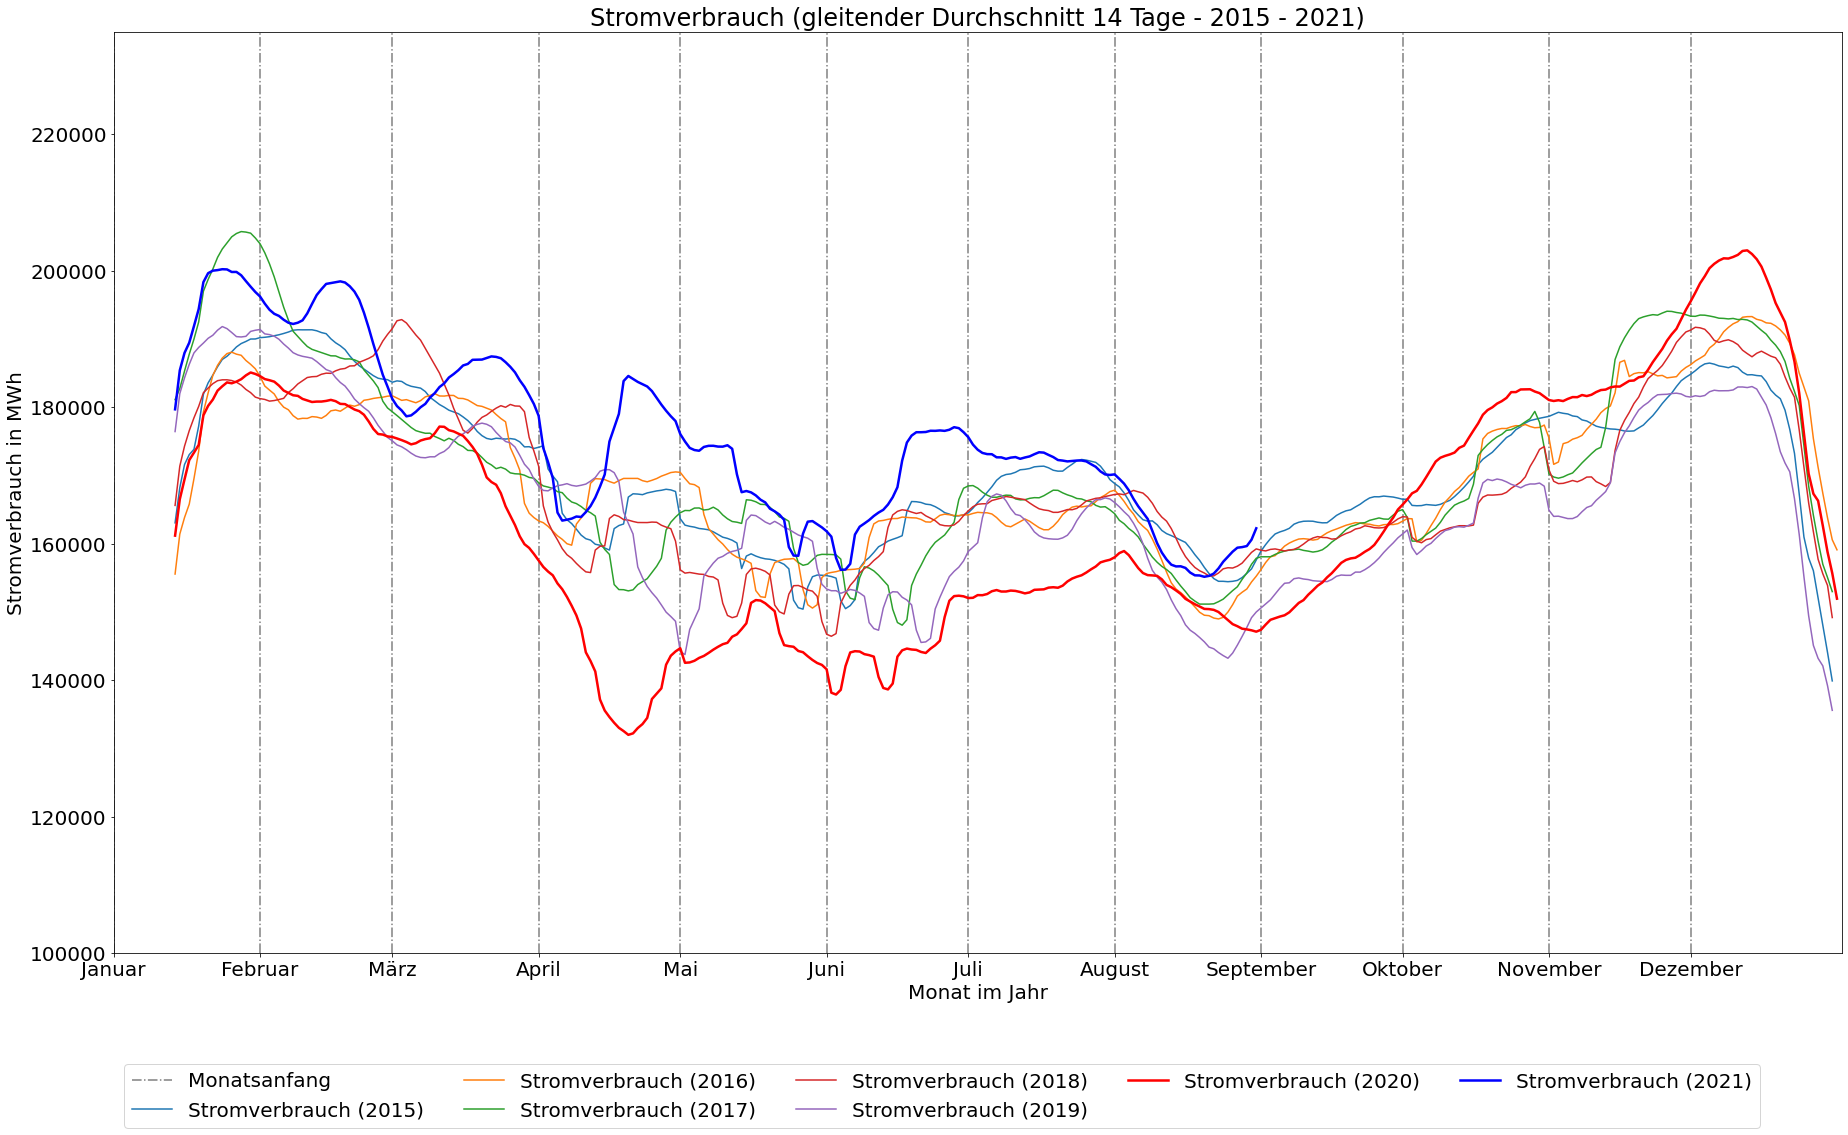

In [16]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]:
    
    ax.axvline(x=i, ymin=0, ymax=1, color="grey", linestyle="-.", label="Monatsanfang")

ax.plot(df_verbrauch["2015-01-01":"2015-12-31"]["verbrauch"].rolling(window=7).mean().values, label="Stromverbrauch (2015)");
ax.plot(df_verbrauch["2016-01-01":"2016-12-31"]["verbrauch"].rolling(window=7).mean().values, label="Stromverbrauch (2016)");
ax.plot(df_verbrauch["2017-01-01":"2017-12-31"]["verbrauch"].rolling(window=7).mean().values, label="Stromverbrauch (2017)");
ax.plot(df_verbrauch["2018-01-01":"2018-12-31"]["verbrauch"].rolling(window=7).mean().values, label="Stromverbrauch (2018)");
ax.plot(df_verbrauch["2019-01-01":"2019-12-31"]["verbrauch"].rolling(window=7).mean().values, label="Stromverbrauch (2019)");
ax.plot(df_verbrauch["2020-01-01":"2020-12-31"]["verbrauch"].rolling(window=7).mean().values, color="red", linewidth=2.5, label="Stromverbrauch (2020)");
ax.plot(df_verbrauch["2021-01-01":"2021-12-31"]["verbrauch"].rolling(window=7).mean().values, color="blue", linewidth=2.5, label="Stromverbrauch (2021)");

ax.set_title("Stromverbrauch (gleitender Durchschnitt 7 Tage - 2015 - 2021)")
ax.set_ylim(100000,235000)
ax.set_ylabel("Stromverbrauch in MWh")
ax.set_xlim(0,366)
ax.set_xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334])
ax.set_xticklabels(["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"])
ax.set_xlabel("Monat im Jahr")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.2), ncol=5)

plt.show()

print("\n\n\n")

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]:
    
    ax.axvline(x=i, ymin=0, ymax=1, color="grey", linestyle="-.", label="Monatsanfang")

ax.plot(df_verbrauch["2015-01-01":"2015-12-31"]["verbrauch"].rolling(window=14).mean().values, label="Stromverbrauch (2015)");
ax.plot(df_verbrauch["2016-01-01":"2016-12-31"]["verbrauch"].rolling(window=14).mean().values, label="Stromverbrauch (2016)");
ax.plot(df_verbrauch["2017-01-01":"2017-12-31"]["verbrauch"].rolling(window=14).mean().values, label="Stromverbrauch (2017)");
ax.plot(df_verbrauch["2018-01-01":"2018-12-31"]["verbrauch"].rolling(window=14).mean().values, label="Stromverbrauch (2018)");
ax.plot(df_verbrauch["2019-01-01":"2019-12-31"]["verbrauch"].rolling(window=14).mean().values, label="Stromverbrauch (2019)");
ax.plot(df_verbrauch["2020-01-01":"2020-12-31"]["verbrauch"].rolling(window=14).mean().values, color="red", linewidth=2.5, label="Stromverbrauch (2020)");
ax.plot(df_verbrauch["2021-01-01":"2021-12-31"]["verbrauch"].rolling(window=14).mean().values, color="blue", linewidth=2.5, label="Stromverbrauch (2021)");

ax.set_title("Stromverbrauch (gleitender Durchschnitt 14 Tage - 2015 - 2021)")
ax.set_ylim(100000,235000)
ax.set_ylabel("Stromverbrauch in MWh")
ax.set_xlim(0,366)
ax.set_xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334])
ax.set_xticklabels(["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"])
ax.set_xlabel("Monat im Jahr")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.2), ncol=5)

plt.show()



 2015 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




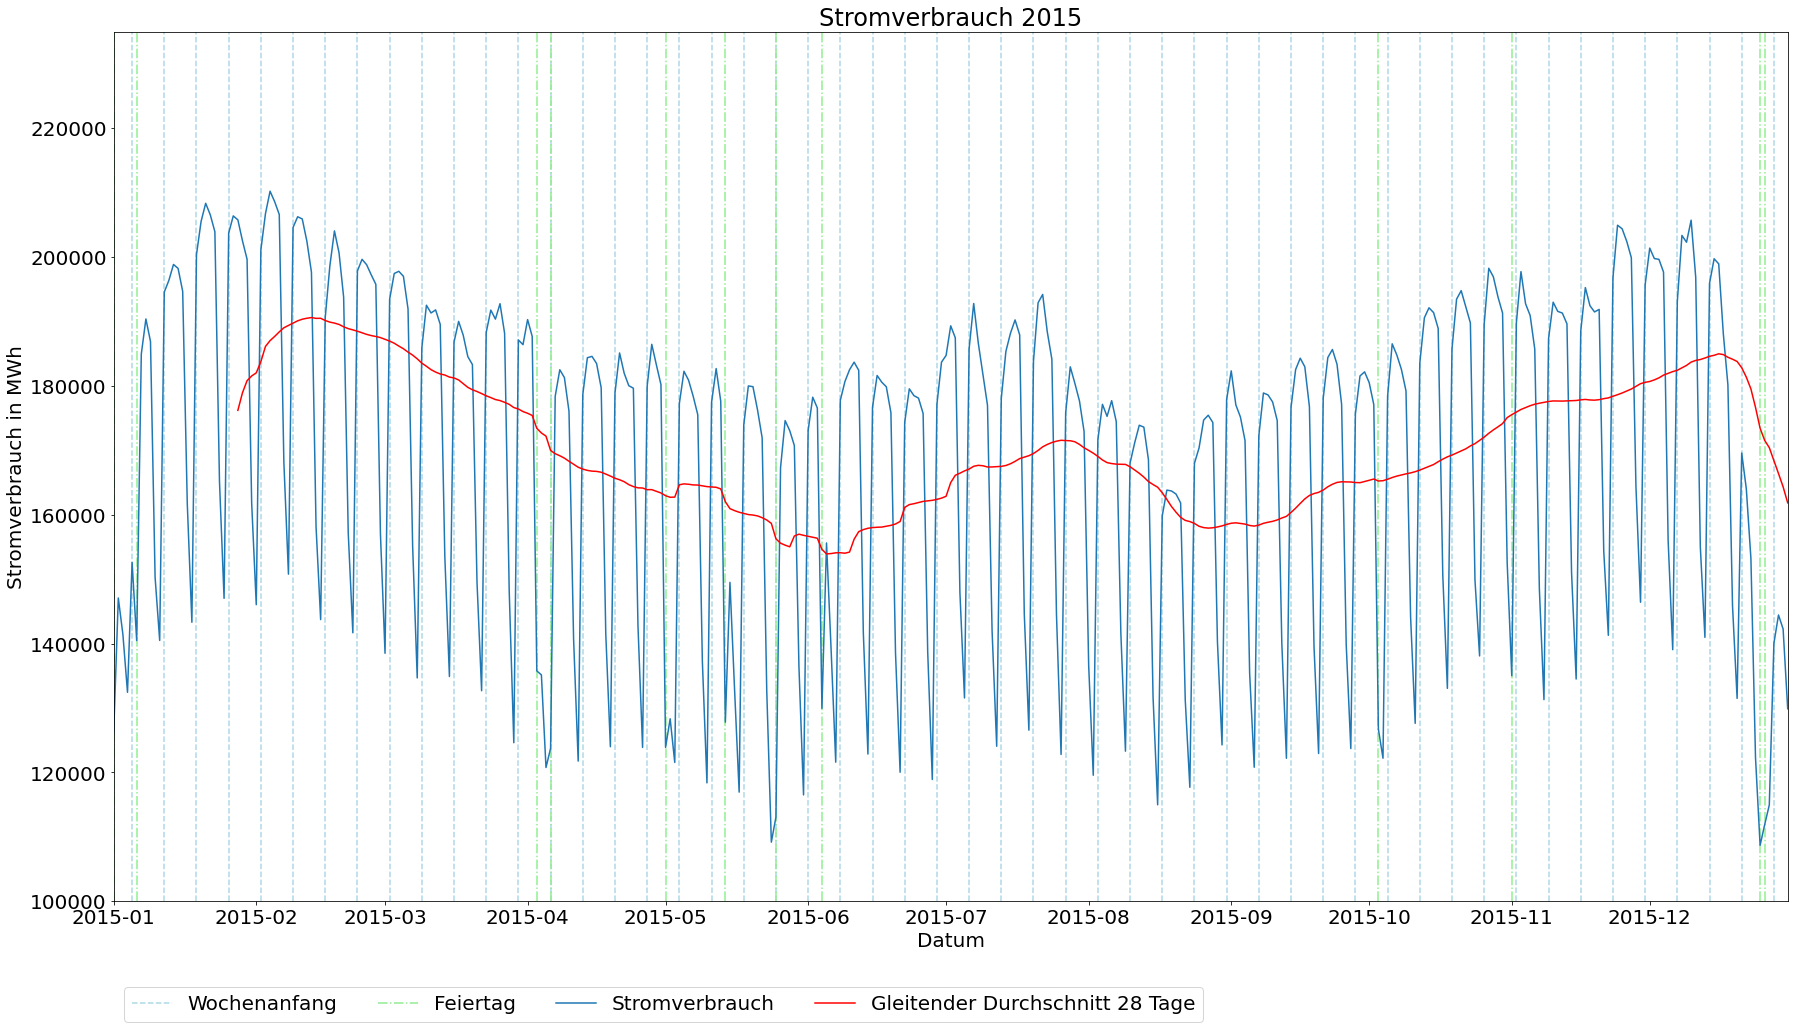

count       365.000000
mean     169613.986301
std       26237.616428
min      108698.000000
25%      145909.000000
50%      178084.000000
75%      189784.000000
max      210222.000000
Name: verbrauch, dtype: float64


 2016 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




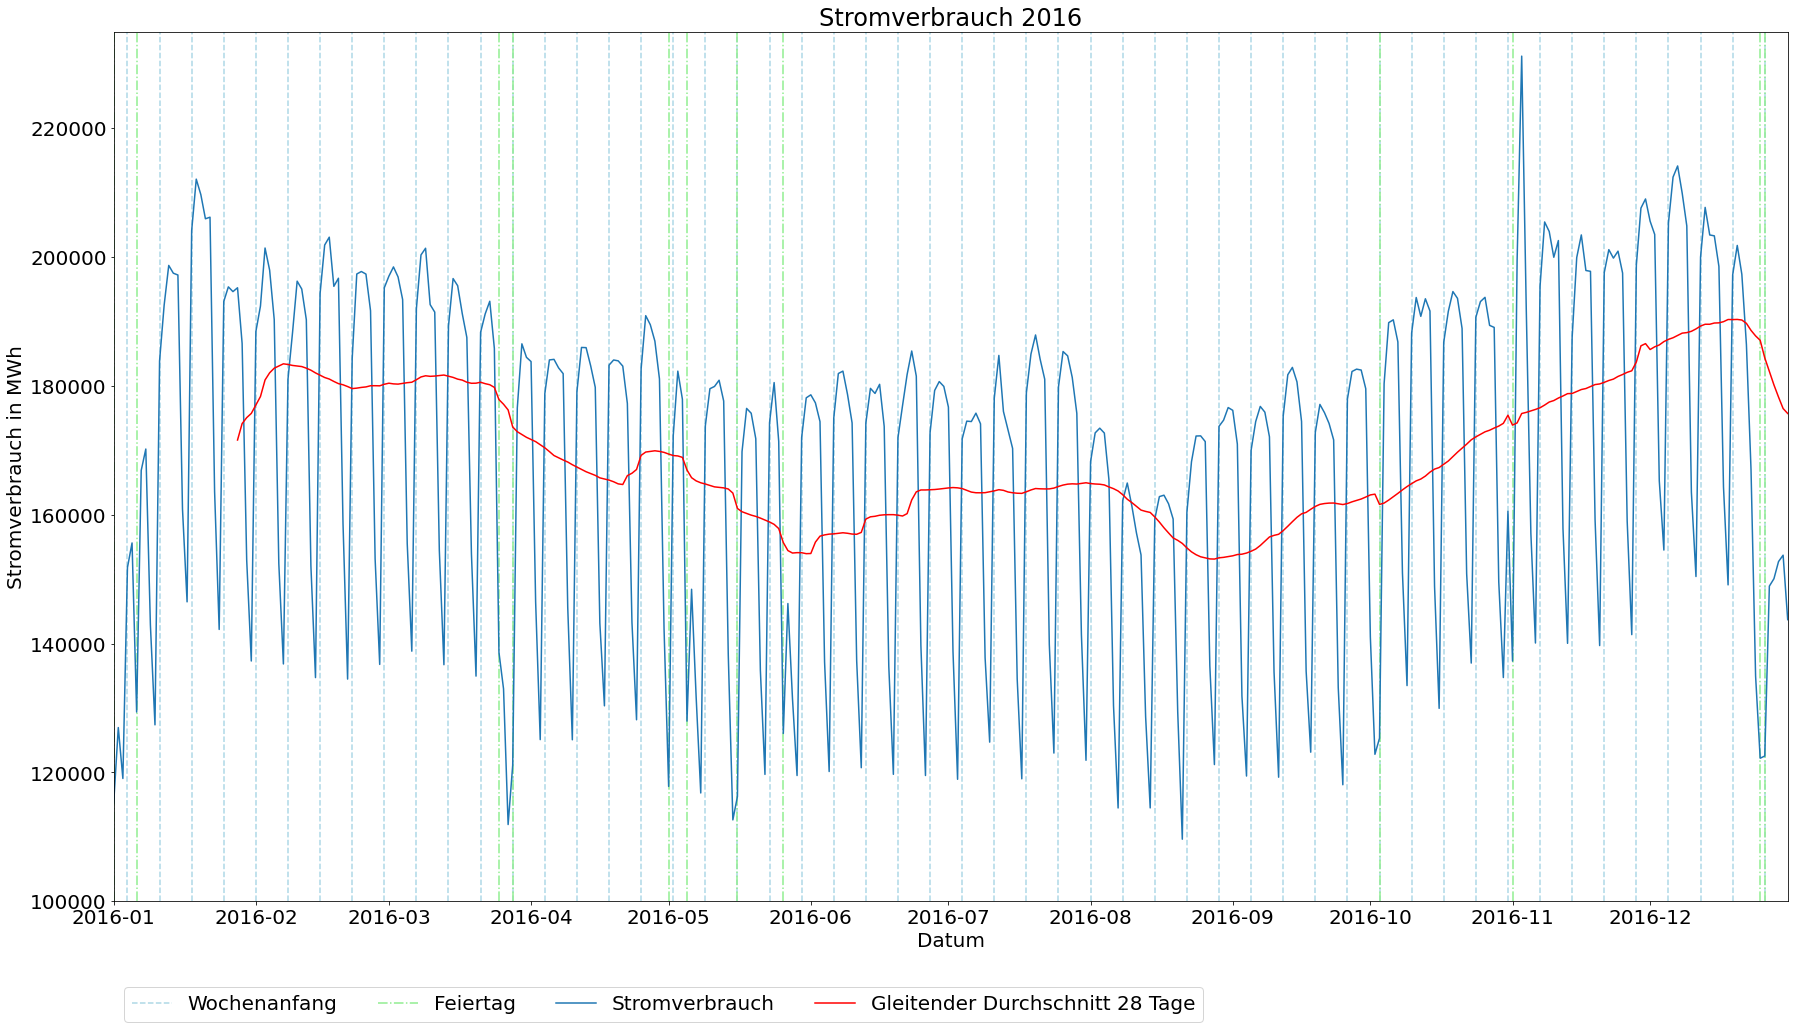

count       366.000000
mean     169040.931694
std       26517.670928
min      109644.000000
25%      146972.250000
50%      175979.000000
75%      189741.250000
max      231190.000000
Name: verbrauch, dtype: float64


 2017 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




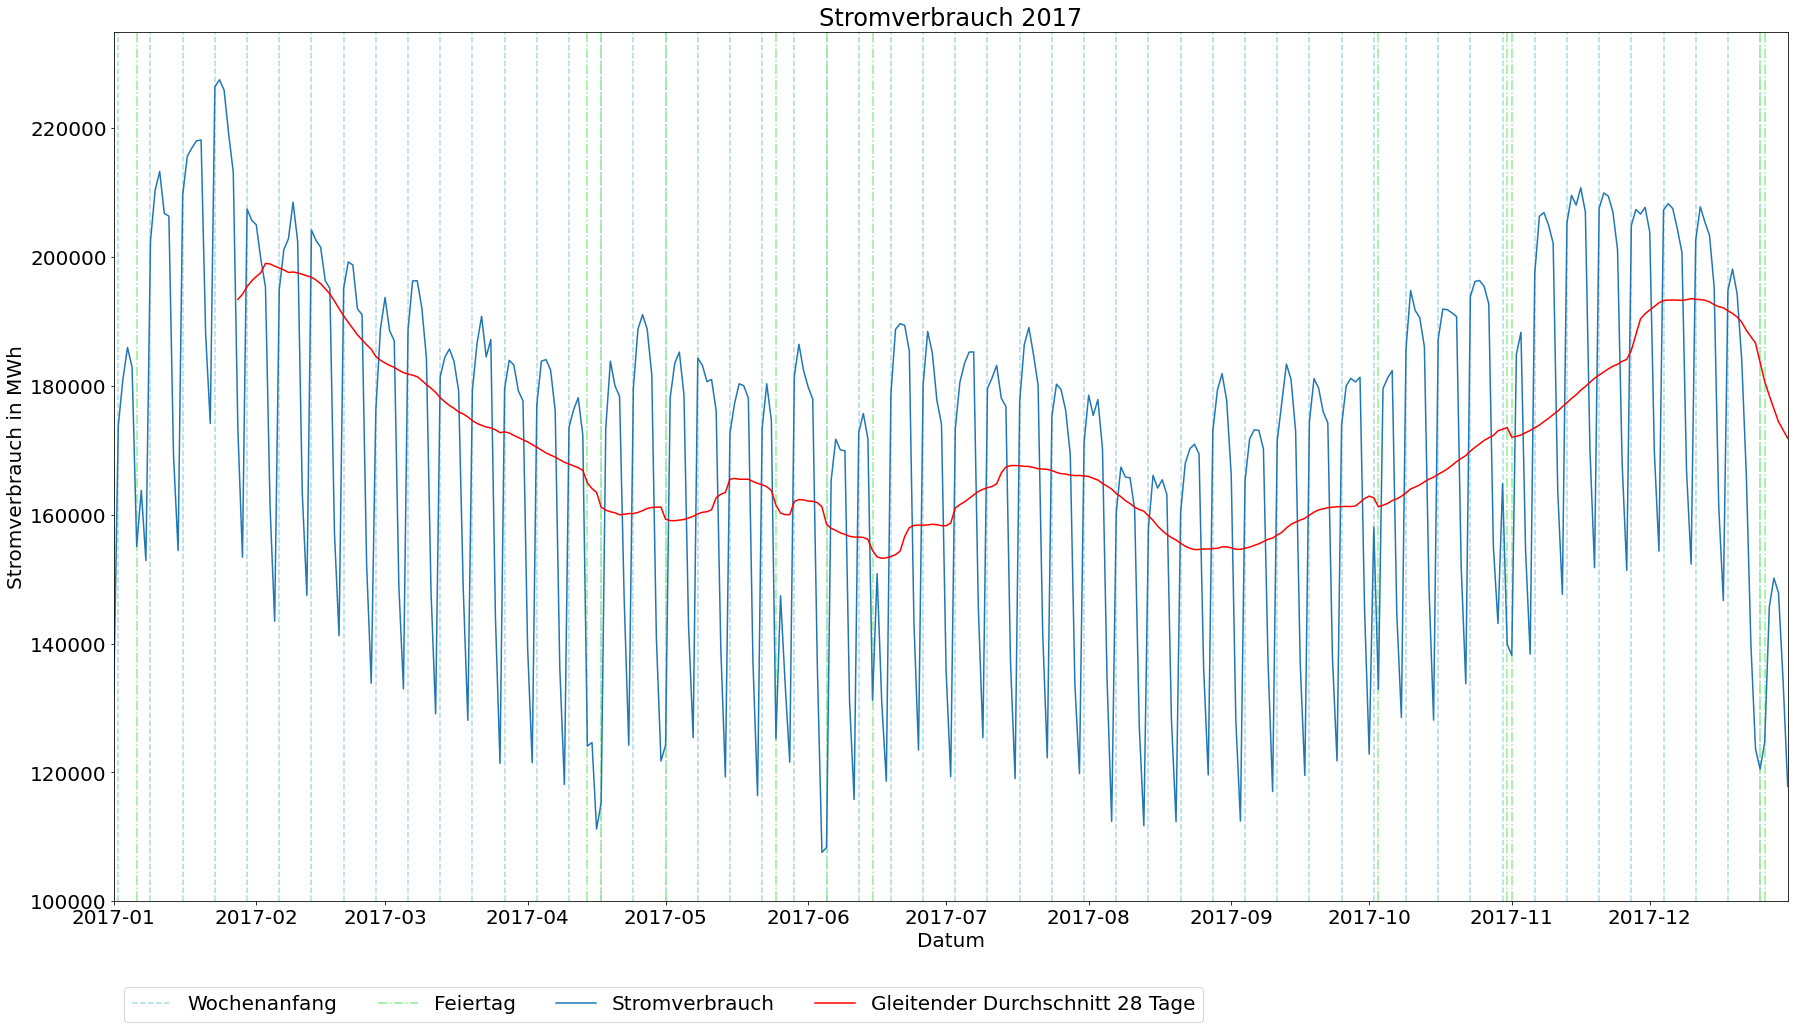

count       365.000000
mean     170383.227397
std       27720.512011
min      107596.000000
25%      148686.000000
50%      177597.000000
75%      188807.000000
max      227529.000000
Name: verbrauch, dtype: float64


 2018 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




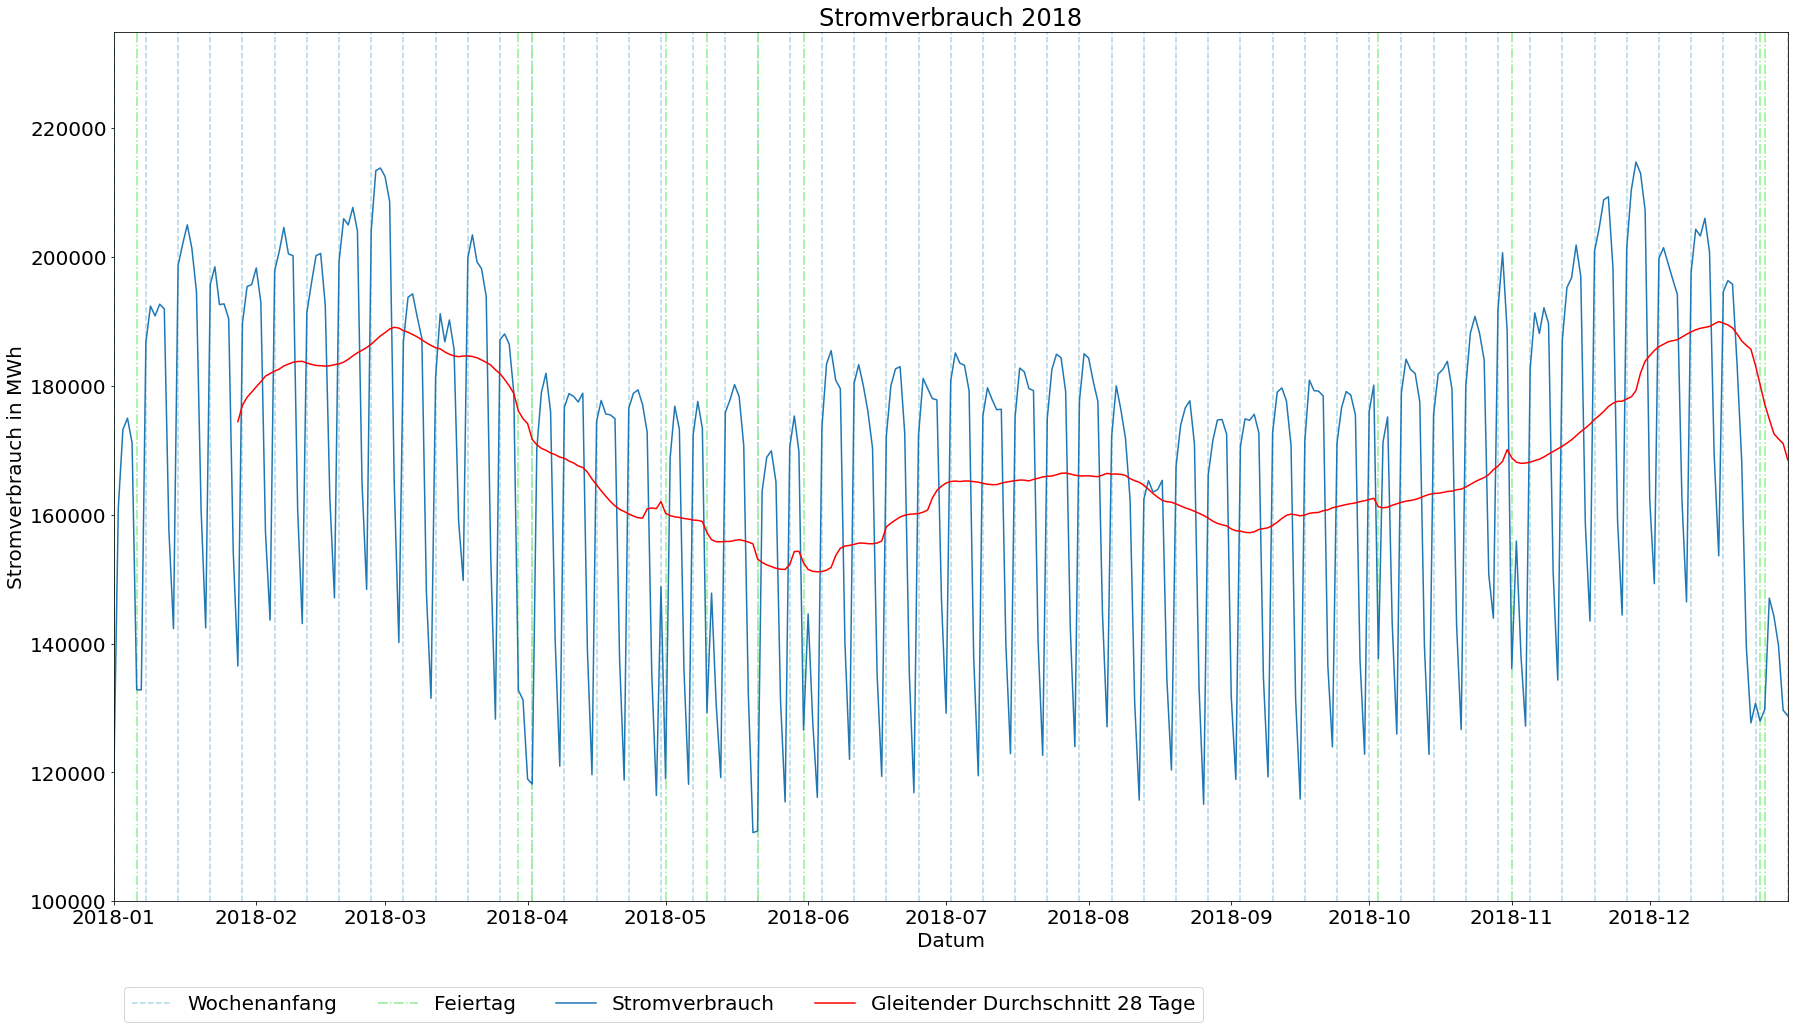

count       365.000000
mean     168303.627397
std       26262.745782
min      110677.000000
25%      144438.000000
50%      175640.000000
75%      186844.000000
max      214748.000000
Name: verbrauch, dtype: float64


 2019 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




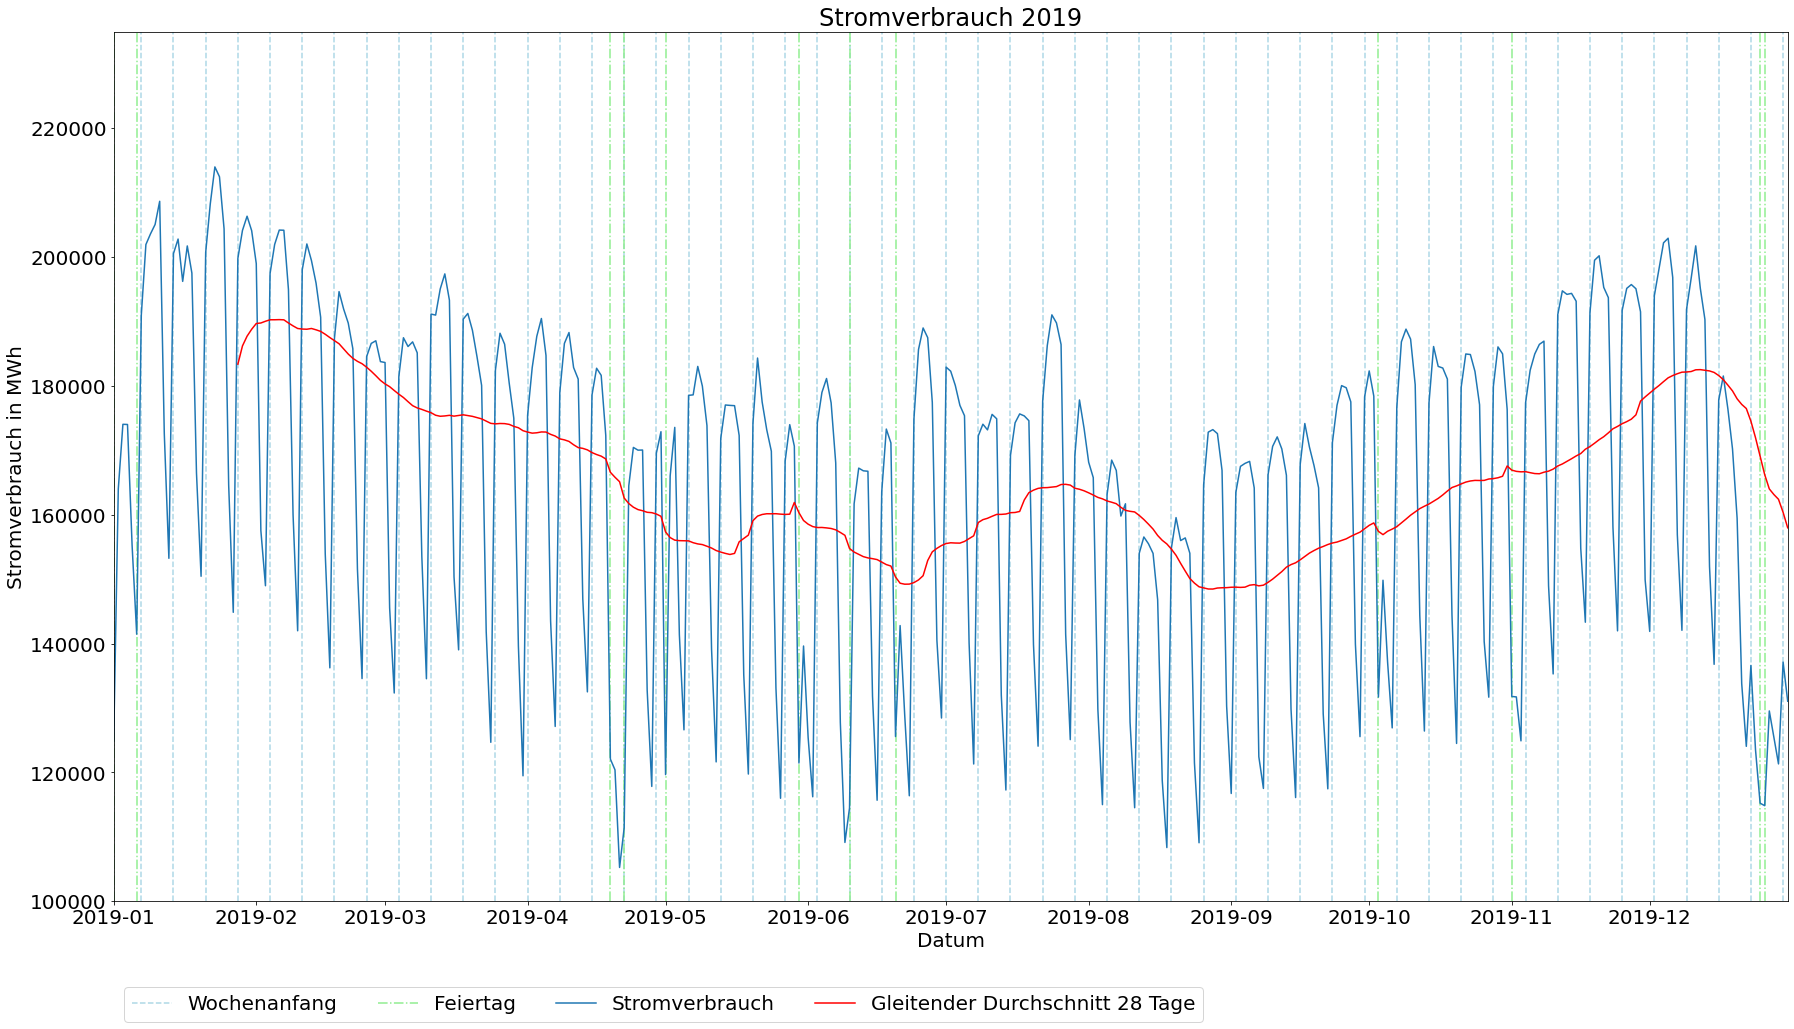

count       365.000000
mean     165227.328767
std       26466.914707
min      105260.000000
25%      141896.000000
50%      172606.000000
75%      185775.000000
max      213993.000000
Name: verbrauch, dtype: float64


 2020 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




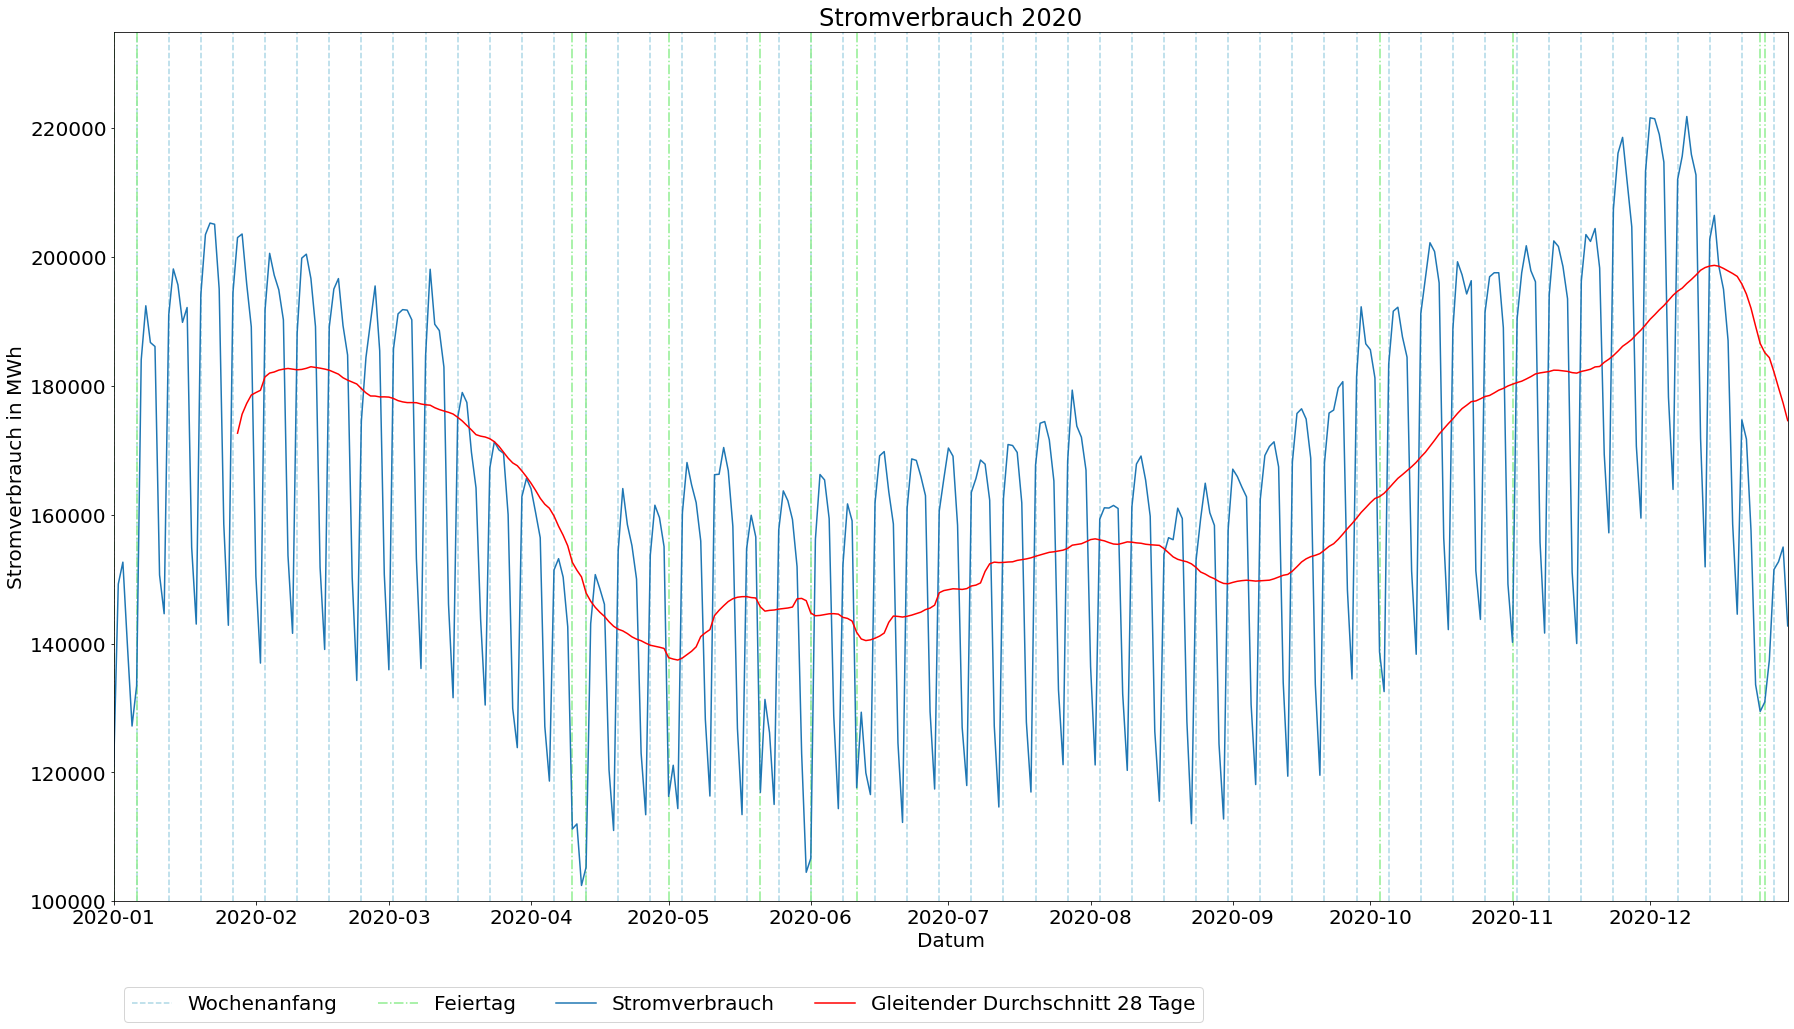

count       366.000000
mean     163535.265027
std       27571.683302
min      102469.000000
25%      144585.750000
50%      163529.500000
75%      187468.750000
max      221820.000000
Name: verbrauch, dtype: float64


 2021 -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




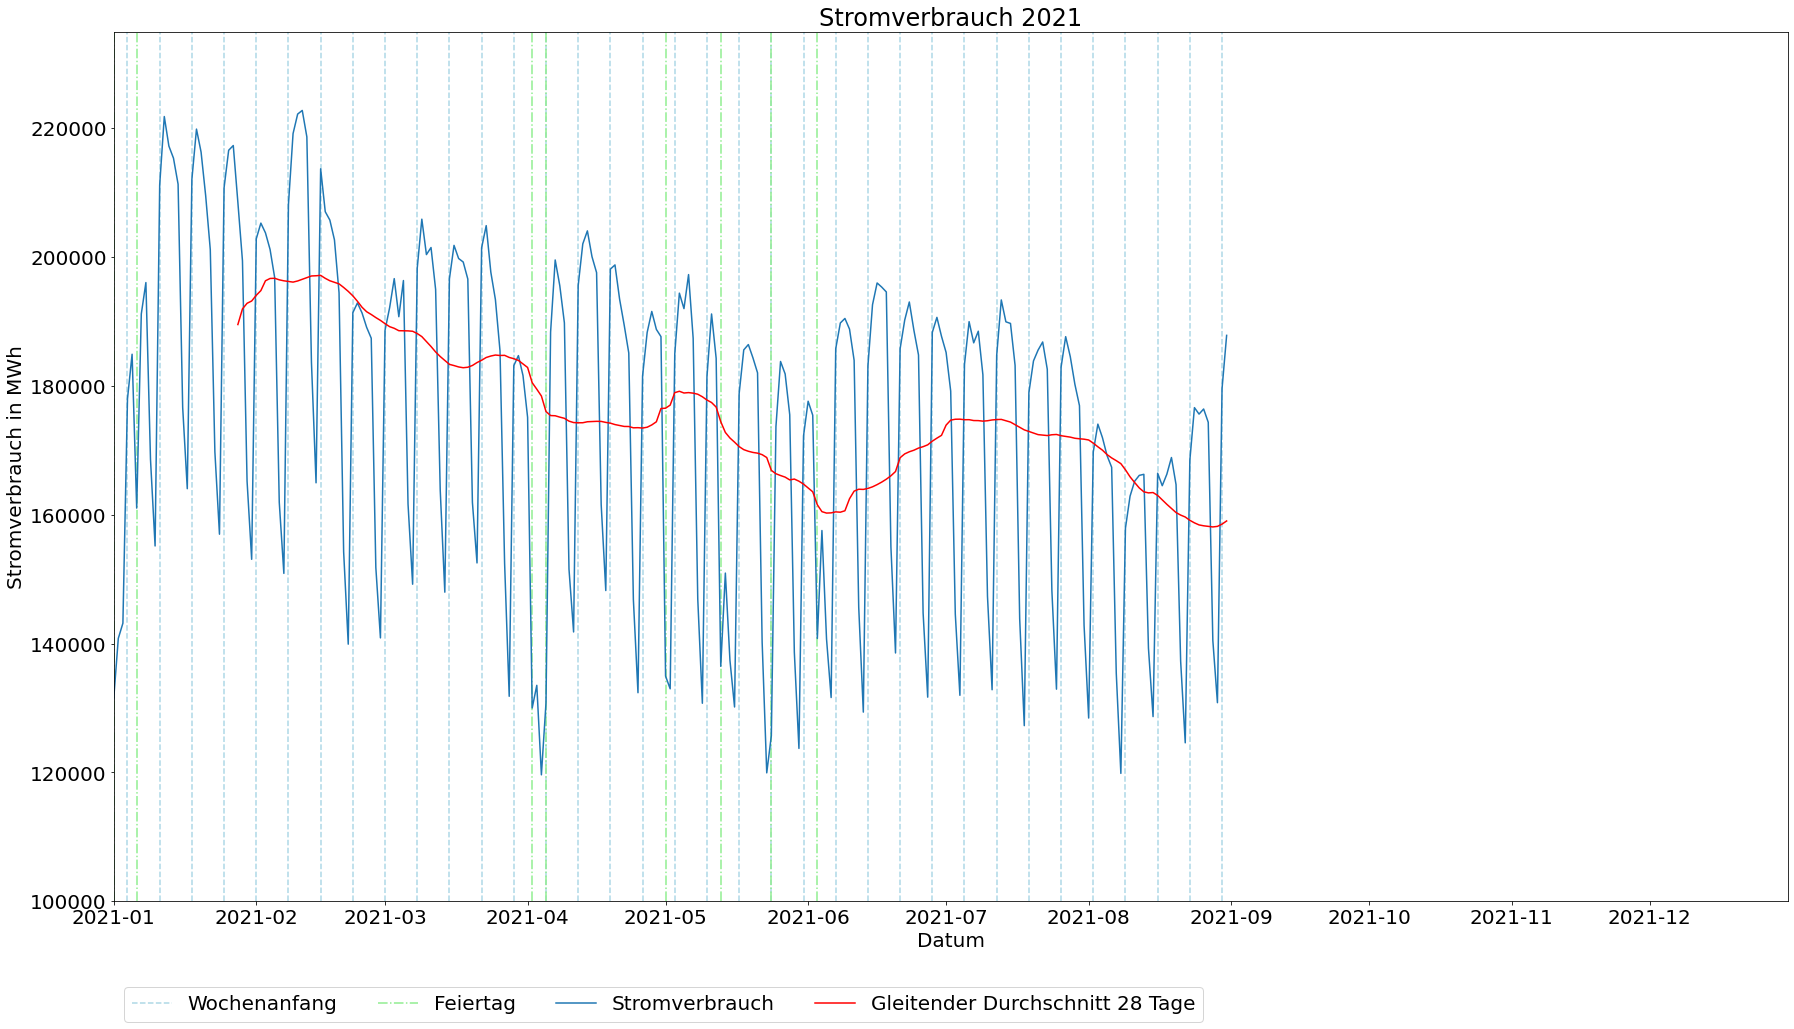

count       243.000000
mean     175296.209877
std       25849.288583
min      119636.000000
25%      153669.000000
50%      183186.000000
75%      193442.000000
max      222761.000000
Name: verbrauch, dtype: float64


In [68]:
for jahr in ["2015", "2016", "2017", "2018", "2019", "2020", "2021"]:
    
    print("\n\n", jahr, "-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
    
    untere_grenze = jahr + "-01-01"
    obere_grenze = jahr + "-12-31"

    functions.draw_weeks(df_verbrauch[untere_grenze:obere_grenze])
    functions.draw_holiday(df_verbrauch[untere_grenze:obere_grenze])

    plt.plot(df_verbrauch[untere_grenze:obere_grenze]["verbrauch"], label="Stromverbrauch");
    plt.plot(df_verbrauch[untere_grenze:obere_grenze]["verbrauch"].rolling(window=28).mean(), color="red", label="Gleitender Durchschnitt 28 Tage")

    plt.title("Stromverbrauch " + jahr)
    plt.ylim(100000,235000)
    plt.ylabel("Stromverbrauch in MWh")
    plt.xlim(dt.datetime(int(jahr), 1, 1), dt.datetime(int(jahr), 12, 31))
    plt.xlabel("Datum")

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=5)

    plt.show()
    
    print(df_verbrauch[untere_grenze:obere_grenze]["verbrauch"].describe())

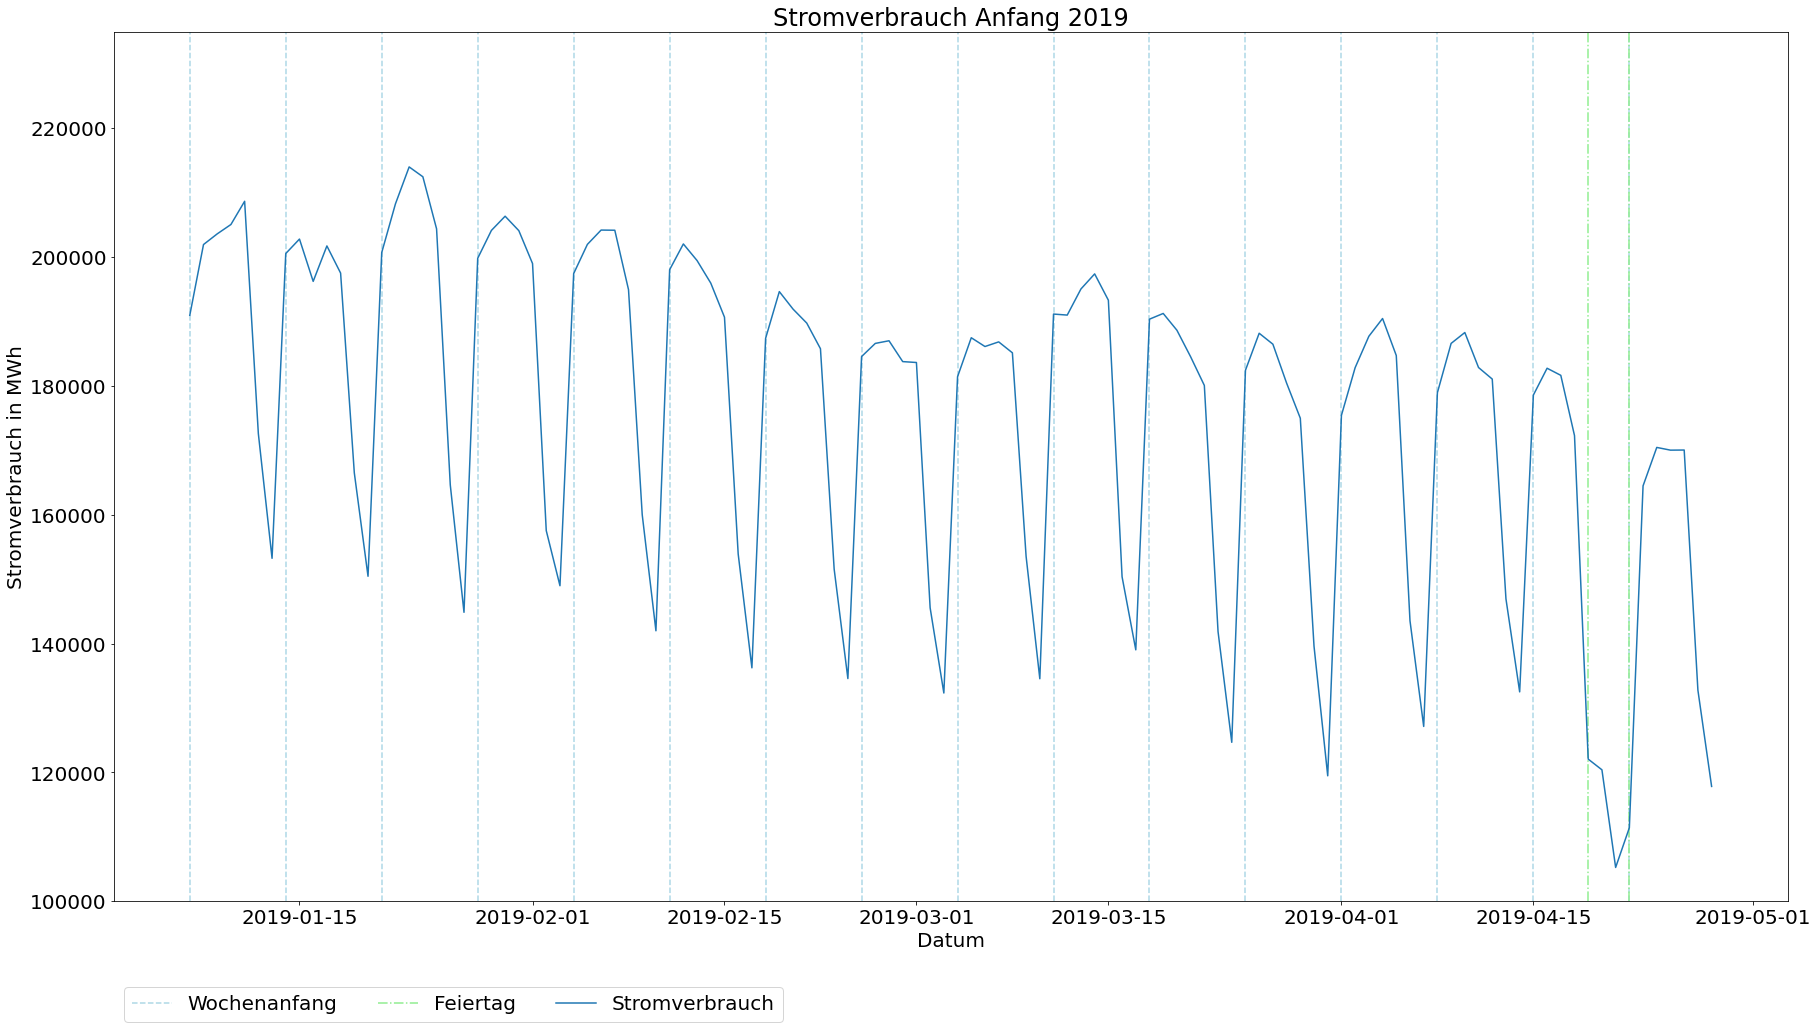

In [5]:
untere_grenze = "2019-01-07"
obere_grenze = "2019-04-28"

functions.draw_weeks(df_verbrauch[untere_grenze:obere_grenze])
functions.draw_holiday(df_verbrauch[untere_grenze:obere_grenze])

plt.plot(df_verbrauch[untere_grenze:obere_grenze]["verbrauch"], label="Stromverbrauch");

plt.title("Stromverbrauch Anfang 2019")
plt.ylim(100000,235000)
plt.ylabel("Stromverbrauch in MWh")
plt.xlabel("Datum")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=5)

plt.show()

# Stromverbrauch nach Monaten

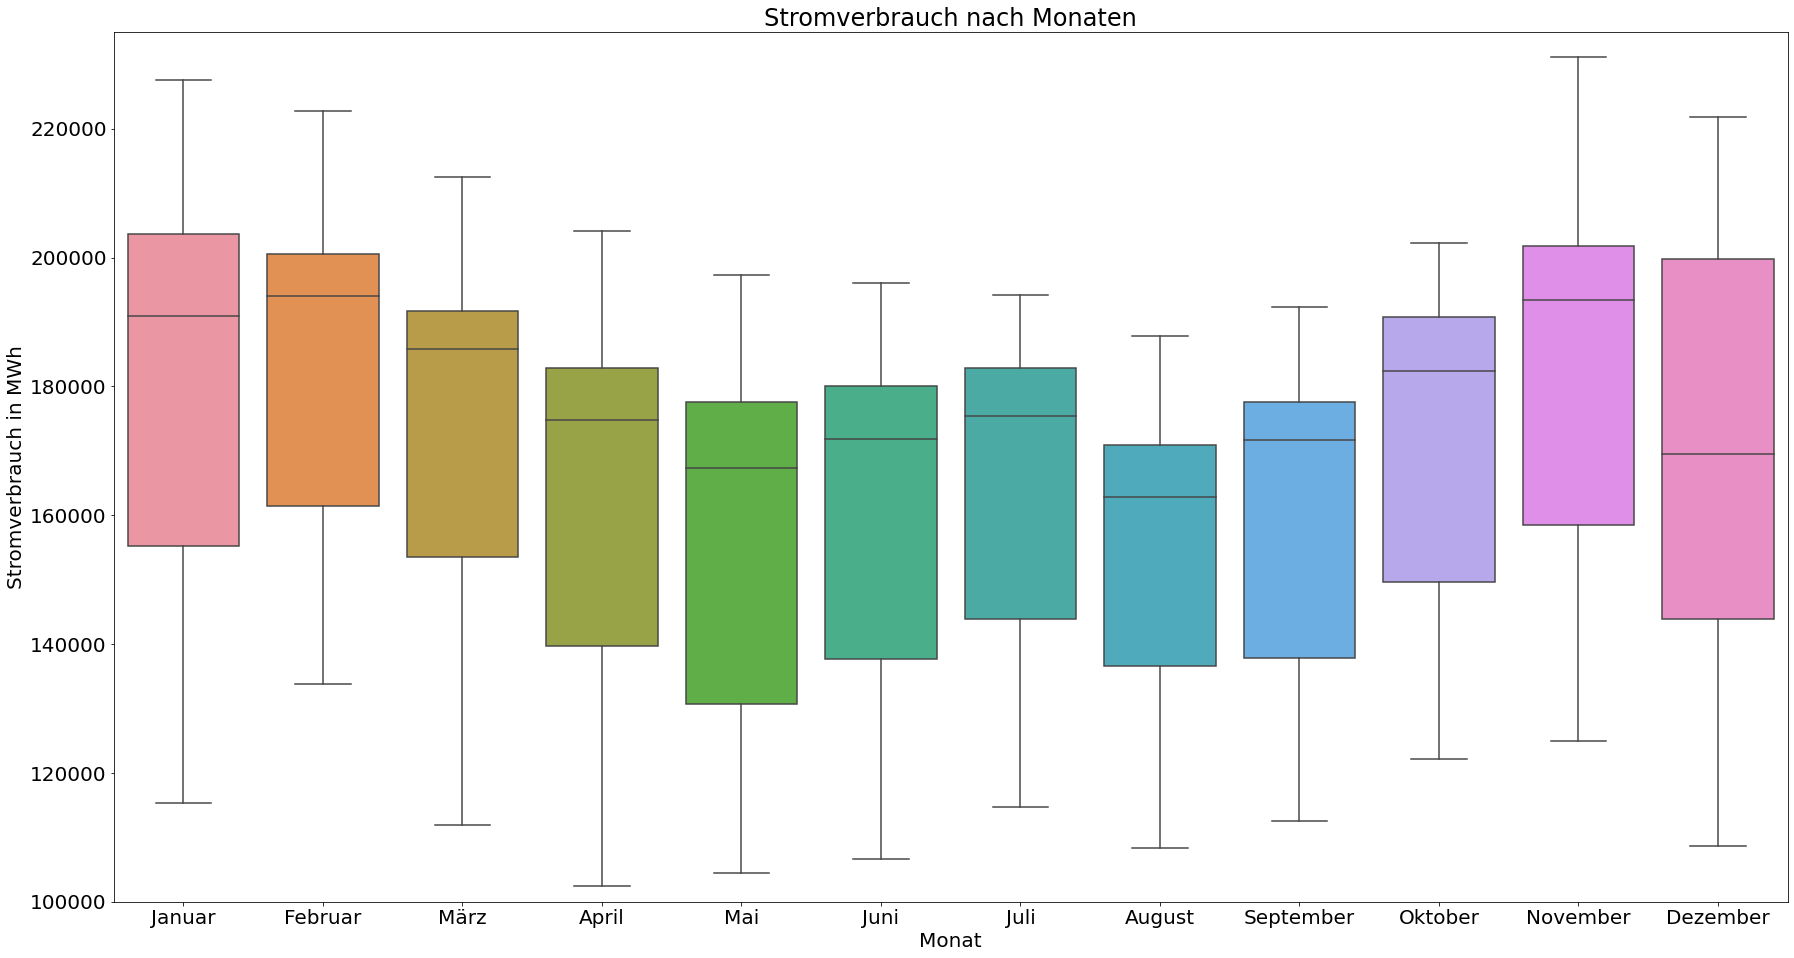

In [37]:
df_verbrauch["monat"] = pd.DatetimeIndex(df_verbrauch.index).month
sns.boxplot(data=df_verbrauch, x="monat", y="verbrauch")

plt.title("Stromverbrauch nach Monaten")
plt.ylim(100000,235000)
plt.ylabel("Stromverbrauch in MWh")
plt.xlabel("Monat")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ["Januar", "Februar", "März", "April", "Mai", "Juni", "Juli", "August", "September", "Oktober", "November", "Dezember"])

plt.show()

# Stromverbrauch nach Tagen

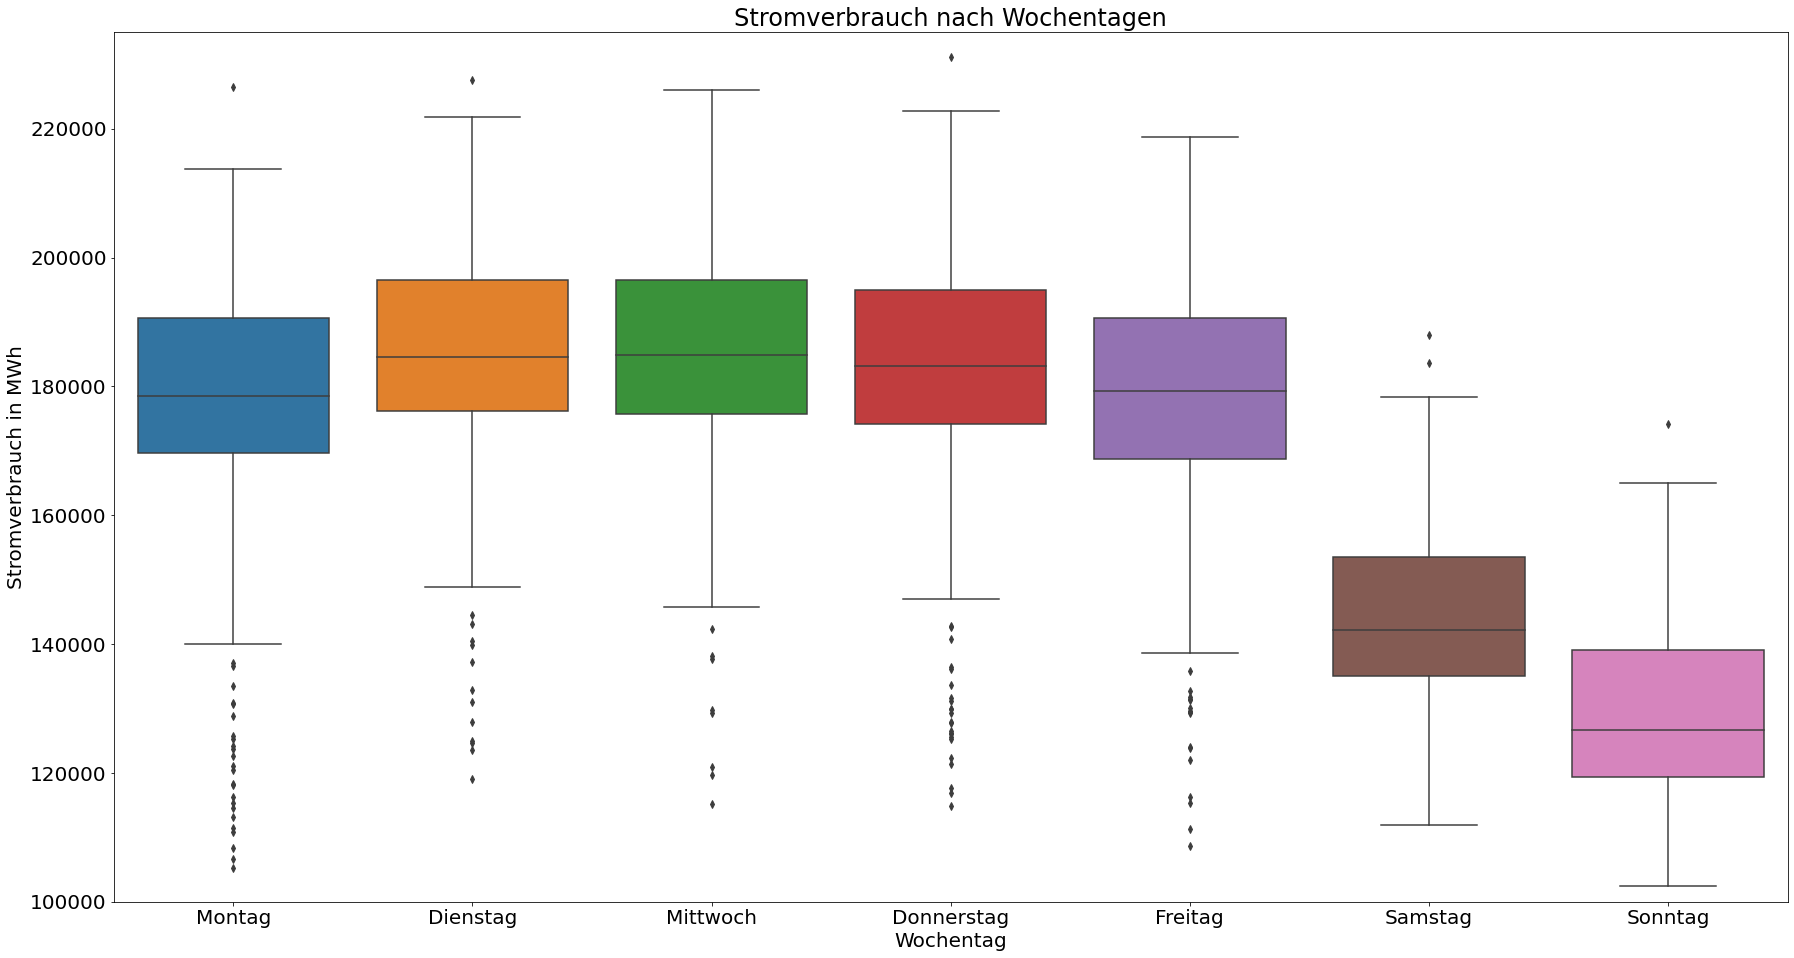

In [38]:
sns.boxplot(data=df_verbrauch, x="wochentag", y="verbrauch", order=["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"])

plt.title("Stromverbrauch nach Wochentagen")
plt.ylim(100000,235000)
plt.ylabel("Stromverbrauch in MWh")
plt.xlabel("Wochentag")

plt.show()

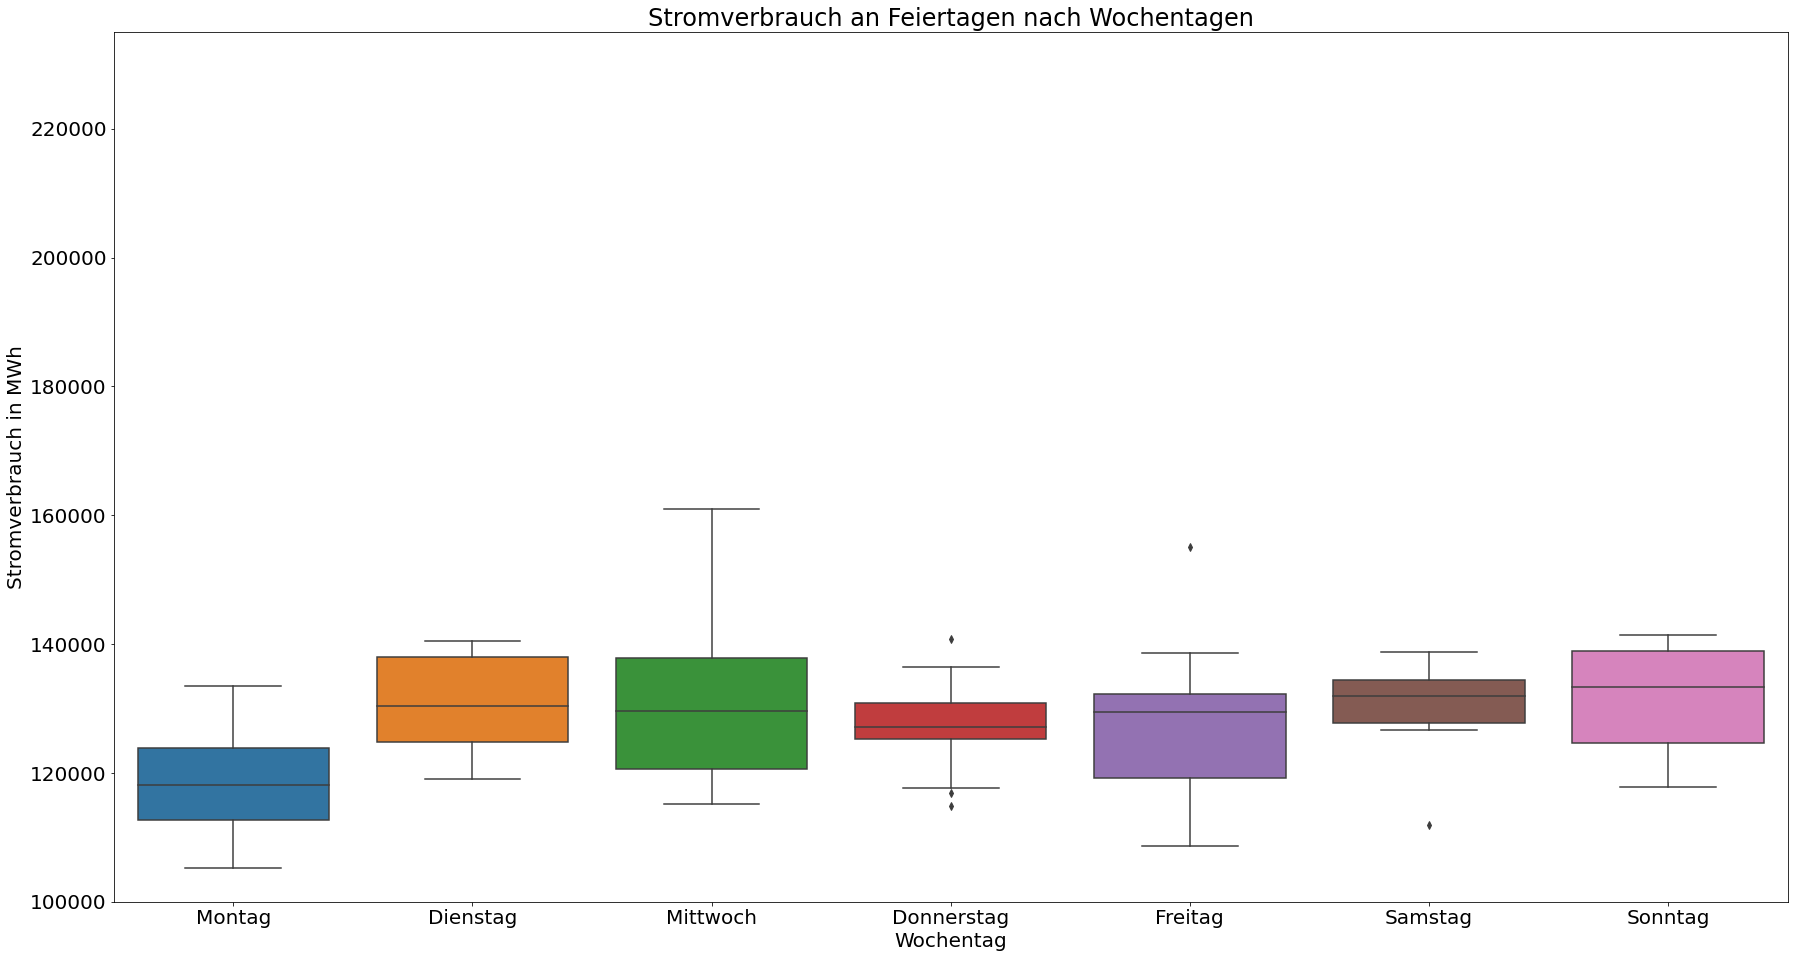

In [6]:
sns.boxplot(data=df_verbrauch[df_verbrauch["feiertag"].isna() == False], x="wochentag", y="verbrauch", order=["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"])

plt.title("Stromverbrauch an Feiertagen nach Wochentagen")
plt.ylim(100000,235000)
plt.ylabel("Stromverbrauch in MWh")
plt.xlabel("Wochentag")

plt.show()

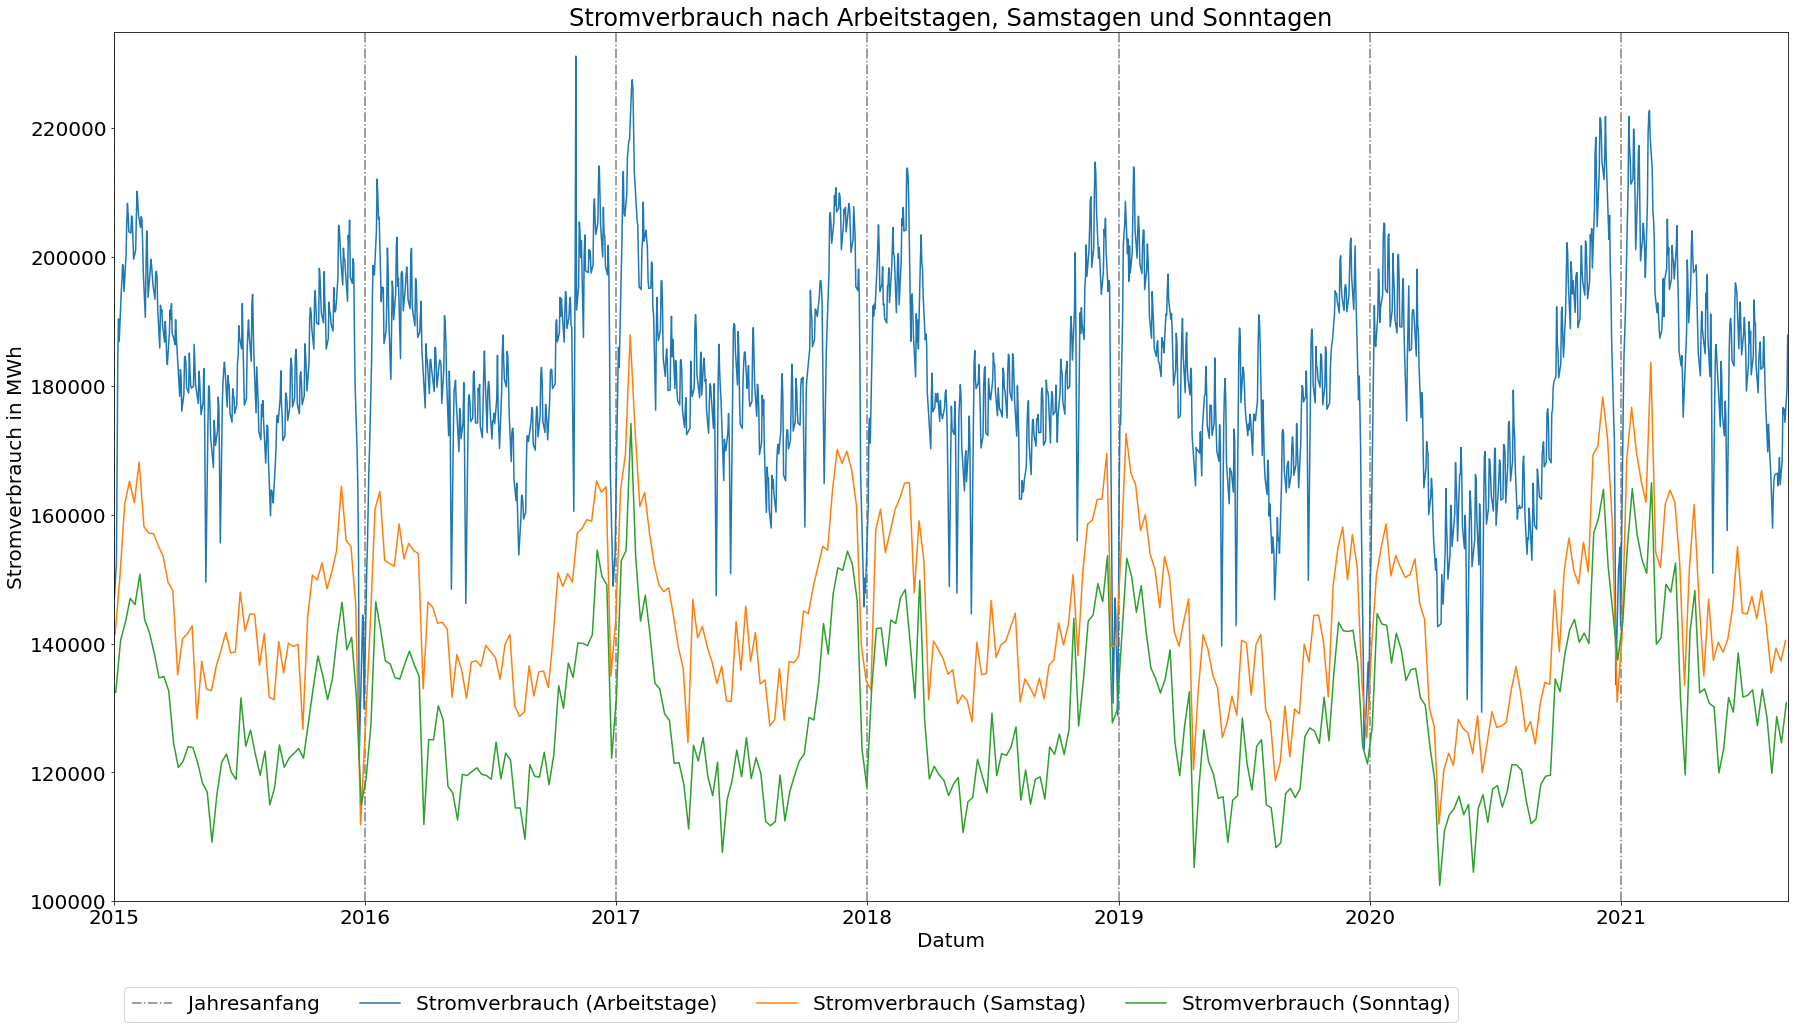

In [85]:
functions.draw_years(df_verbrauch)

plt.plot(df_verbrauch[df_verbrauch["arbeitstag"] == 1]["verbrauch"], label="Stromverbrauch (Arbeitstage)");
plt.plot(df_verbrauch[df_verbrauch["wochentag"] == "Samstag"]["verbrauch"], label="Stromverbrauch (Samstag)");
plt.plot(df_verbrauch[df_verbrauch["wochentag"] == "Sonntag"]["verbrauch"], label="Stromverbrauch (Sonntag)");

plt.title("Stromverbrauch nach Arbeitstagen, Samstagen und Sonntagen")
plt.ylim(100000,235000)
plt.ylabel("Stromverbrauch in MWh")
plt.xlim(dt.datetime(2015,1,1), dt.datetime(2021,8,31))
plt.xlabel("Datum")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="lower left", bbox_to_anchor=(0,-0.15), ncol=5)

plt.show()

# Regressionsanalyse

In [5]:
pf = PolynomialFeatures(degree=4)
transformiert = pf.fit_transform(df["arbeitstag"].values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(transformiert, df["verbrauch"].values.reshape(-1, 1), test_size=0.1, random_state=0)

model = LinearRegression().fit(X_train, y_train)

preds = model.predict(X_test)

functions.custom_metrics(y_test, preds)

NameError: name 'df' is not defined